# 서울 연령군 별 회복 속도
- 시각화 초점

In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation

# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.float_format', lambda x : '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 데이터 로드
avgAge = pd.read_csv('/content/avgAge.csv', encoding='CP949')
PatientInfo = pd.read_csv('/content/PatientInfo.csv')

## 회복기간 = 확진날짜 - 퇴원날짜

나이순으로 정렬하고 결측치를 제거한다.

released date의 결측치에는 사망자 등을 포함되었을 것으로 예상

In [ ]:
patient = PatientInfo[['province', 'city','confirmed_date','released_date']]
patient = patient.sort_values(by=["province"], ascending=[True] )
patient

,province,city,confirmed_date,released_date
926,Busan,Dongnae-gu,2020-02-27,NaN
875,Busan,Seo-gu,2020-02-22,NaN
876,Busan,Dongnae-gu,2020-02-22,NaN
877,Busan,Dongnae-gu,2020-02-22,NaN
878,Busan,Geumjeong-gu,2020-02-22,NaN
...,...,...,...,...
1400,Ulsan,Nam-gu,2020-04-11,2020-04-20
1401,Ulsan,Dong-gu,2020-03-07,2020-04-03
1402,Ulsan,Buk-gu,2020-03-10,2020-03-19
1404,Ulsan,Nam-gu,2020-03-12,2020-03-31


In [ ]:
patient = patient.dropna()
patient = patient.drop(patient[patient.city=='etc'].index)
patient = patient.drop(patient[patient.province != 'Seoul'].index)
patient = patient.reset_index(drop =True)
patient

,province,city,confirmed_date,released_date
0,Seoul,Gwanak-gu,2020-02-29,2020-03-20
1,Seoul,Dongdaemun-gu,2020-02-27,2020-03-14
2,Seoul,Seocho-gu,2020-02-27,2020-03-04
3,Seoul,Gangdong-gu,2020-02-27,2020-03-03
4,Seoul,Gangnam-gu,2020-02-29,2020-03-20
5,Seoul,Gangnam-gu,2020-02-29,2020-03-04
6,Seoul,Gangnam-gu,2020-02-29,2020-03-14
7,Seoul,Gangnam-gu,2020-02-29,2020-03-04
8,Seoul,Gwanak-gu,2020-02-29,2020-03-03
9,Seoul,Seodaemun-gu,2020-02-28,2020-03-14


confirmed_date 와 released_date 를 통해 회복 기간을 계산하기 위하여 '-'를 제거해주는 함수를 설정하고 각 열에 적용해 준다,

In [ ]:
def changestr(date):
    d = date.split('-')
    return ''.join(d)

In [ ]:
patient['str_confirmed_date'] = patient['confirmed_date'].apply(changestr)
patient['str_released_date'] = patient['released_date'].apply(changestr)

datetime 모듈을 불러오고 released_date에서 confirmed_date를 빼준다. 회복 기간(recovery periods)를 반환한다.

In [ ]:
from datetime import datetime

def interval_between_date(str_confirmed_date, str_released_date):
  
  recovery_periods = (datetime.strptime(str_released_date, '%Y%m%d').date() - datetime.strptime(str_confirmed_date, '%Y%m%d').date()).days
  return recovery_periods

In [ ]:
patient = patient.dropna()

In [ ]:
# str_confirmed_date = pd.DataFrame(patient.str_confirmed_date)
# str_confirmed_date

In [ ]:
# str_released_date = pd.DataFrame(patient.str_released_date)
# str_released_date

In [ ]:
a = []
for c, r in zip(patient.str_confirmed_date, patient.str_released_date):
    a.append(interval_between_date(c, r))
a = pd.DataFrame(a)
a.columns = ['recovery_periods']

In [ ]:
patient = patient.dropna()
patient = patient.drop(['str_confirmed_date', 'str_released_date'], axis=1)

recovery_periods를 표에 합쳐준다.

In [ ]:
patient['recovery_periods'] = a['recovery_periods']
patient

,province,city,confirmed_date,released_date,recovery_periods
0,Seoul,Gwanak-gu,2020-02-29,2020-03-20,20
1,Seoul,Dongdaemun-gu,2020-02-27,2020-03-14,16
2,Seoul,Seocho-gu,2020-02-27,2020-03-04,6
3,Seoul,Gangdong-gu,2020-02-27,2020-03-03,5
4,Seoul,Gangnam-gu,2020-02-29,2020-03-20,20
5,Seoul,Gangnam-gu,2020-02-29,2020-03-04,4
6,Seoul,Gangnam-gu,2020-02-29,2020-03-14,14
7,Seoul,Gangnam-gu,2020-02-29,2020-03-04,4
8,Seoul,Gwanak-gu,2020-02-29,2020-03-03,3
9,Seoul,Seodaemun-gu,2020-02-28,2020-03-14,15


지역을 기준으로 그룹화하고 각 지역의 회복기간의 평균을 계산한다.
이를 시각화한다.

In [ ]:
recovery = patient.groupby(['city'])['recovery_periods'].mean()
recovery = pd.DataFrame(recovery.apply(pd.to_numeric))
recovery = recovery.sort_values(by = 'city', ascending=True)
# recovery = recovery.drop(['100'])
recovery.reset_index(inplace = True)
recovery = recovery[['city', 'recovery_periods']]
# recovery = recovery.drop(['city'], axis=1, inplace=True )


recovery

,city,recovery_periods
0,Dongdaemun-gu,13.67
1,Eunpyeong-gu,14.67
2,Gangdong-gu,6.50
3,Gangnam-gu,12.43
4,Gangseo-gu,11.50
5,Guro-gu,21.00
6,Gwanak-gu,11.50
7,Jongno-gu,17.00
8,Jungnang-gu,32.00
9,Mapo-gu,16.00


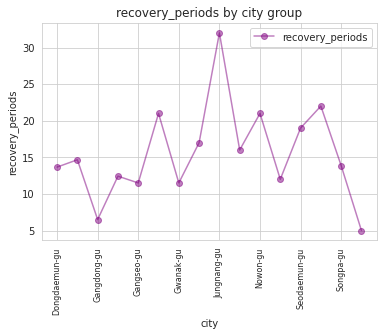

In [ ]:
recovery.plot(x = 'city', y = 'recovery_periods',color='purple', marker='o', linestyle='solid', alpha=0.5)
plt.title('recovery_periods by city group')
# plt.ylim(17.5, 35)  # y축의 최솟값과 최댓값 지정
plt.ylabel('recovery_periods')
plt.xticks(fontsize=8,rotation=90)
plt.legend()
plt.show()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


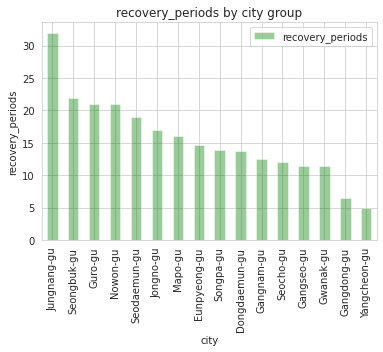

In [ ]:
recovery = recovery.sort_values('recovery_periods', ascending = False)
recovery.plot.bar(x = 'city', y = 'recovery_periods', color='green', alpha=0.4)
plt.title('recovery_periods by city group')
# plt.ylim(17.5, 35)  # y축의 최솟값과 최댓값 지정
plt.ylabel('recovery_periods')
plt.legend()
plt.show()

## 지역 별 회복 기간 시각화 -지도편
- folium

In [ ]:
import folium

json을 불러와, 서울시 구별 데이터 뿌려주기

In [ ]:
import json

회복률의 정도에 따라 지도에 뿌려보자!

In [ ]:
recovery = patient.groupby(['city'])['recovery_periods'].mean()
recovery = pd.DataFrame(recovery.apply(pd.to_numeric))
recovery = recovery.sort_values(by = 'city', ascending=True)
# recovery = recovery.drop(['100'])
recovery.reset_index(inplace = True)
recovery = recovery[['city', 'recovery_periods']]
# recovery = recovery.drop(['city'], axis=1, inplace=True )


recovery

,city,recovery_periods
0,Dongdaemun-gu,13.67
1,Eunpyeong-gu,14.67
2,Gangdong-gu,6.50
3,Gangnam-gu,12.43
4,Gangseo-gu,11.50
5,Guro-gu,21.00
6,Gwanak-gu,11.50
7,Jongno-gu,17.00
8,Jungnang-gu,32.00
9,Mapo-gu,16.00


In [ ]:
with open('/content/geo_seoul.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=11,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=recovery,
               columns=['city','recovery_periods'],
               key_on='feature.properties.name_eng',
               fill_color='PuRd',
               legend_name = 'recovery_periods')
map1

### 구별 확진자 수

In [ ]:
city_confirmed_number = PatientInfo[['province', 'city', 'patient_id']]
city_confirmed_number

,province,city,patient_id
0,Seoul,Gangseo-gu,1000000001
1,Seoul,Jungnang-gu,1000000002
2,Seoul,Jongno-gu,1000000003
3,Seoul,Mapo-gu,1000000004
4,Seoul,Seongbuk-gu,1000000005
...,...,...,...
3999,Jeju-do,Jeju-do,7000000010
4000,Jeju-do,Jeju-do,7000000011
4001,Jeju-do,Jeju-do,7000000012
4002,Jeju-do,Jeju-do,7000000013


In [ ]:
city_confirmed_number = city_confirmed_number.dropna()
city_confirmed_number = city_confirmed_number.drop(city_confirmed_number[city_confirmed_number.city=='etc'].index)
city_confirmed_number = city_confirmed_number.drop(city_confirmed_number[city_confirmed_number.province != 'Seoul'].index)
city_confirmed_number = city_confirmed_number.reset_index(drop =True)
city_confirmed_number

,province,city,patient_id
0,Seoul,Gangseo-gu,1000000001
1,Seoul,Jungnang-gu,1000000002
2,Seoul,Jongno-gu,1000000003
3,Seoul,Mapo-gu,1000000004
4,Seoul,Seongbuk-gu,1000000005
...,...,...,...
803,Seoul,Yeongdeungpo-gu,1000000859
804,Seoul,Yeongdeungpo-gu,1000000860
805,Seoul,Yeongdeungpo-gu,1000000861
806,Seoul,Gangnam-gu,1000000862


In [ ]:
c = pd.DataFrame(city_confirmed_number.groupby(['city'])['patient_id'].count())
c = c.rename(columns = {'patient_id' : 'count'})
c.reset_index(inplace = True)
c = c[['city', 'count']]
c

,city,count
0,Dobong-gu,19
1,Dongdaemun-gu,34
2,Dongjak-gu,40
3,Eunpyeong-gu,35
4,Gangbuk-gu,14
5,Gangdong-gu,24
6,Gangnam-gu,75
7,Gangseo-gu,45
8,Geumcheon-gu,16
9,Guro-gu,40


In [ ]:
with open('/content/geo_seoul.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=11,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=c,
               columns=['city','count'],
               key_on='feature.properties.name_eng',
               fill_color='PuRd',
               legend_name = 'count')
map1

In [ ]:
recovery = recovery.set_index('city')

In [ ]:
with open('/content/geo_seoul.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=11,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=recovery,
               columns=['city','recovery_periods'],
               key_on='feature.properties.name_eng',
               fill_color='PuRd',
               legend_name = 'recovery_periods')
map1

### 서울 지역별 연령 분포

In [ ]:
avgAge = avgAge.loc[2:27]

In [ ]:
avgAge['city'] = avgAge['city'].str.replace('서울특별시 ','').replace(' ')
avgAge['city'] = avgAge['city'].str.split(" ")
avgAge['city'] = avgAge['city'].str[0]
avgAge = avgAge.reset_index(drop = 'index')
avgAge

In [ ]:
with open('/content/geo_seoul.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=11,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=avgAge,
               columns=['city','avgAge'],
               key_on='feature.properties.name',
               fill_color='PuRd',
               legend_name = 'avgAge')
map1